# Import Packages

In [1]:
import matplotlib.pyplot as plt
from utils import create_dataset,model_plot,history_plot, read_data, plot_data, prepare_train_test_data
import numpy as np
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

# Load data

In [2]:
clean_df,data=read_data('portfolio_data.csv',debug=True)

        Date        AMZN        DPZ         BTC       NFLX
0   5/1/2013  248.229996  51.190983  106.250000  30.415714
1   5/2/2013  252.550003  51.987320   98.099998  30.641428
2   5/3/2013  258.049988  52.446388  112.900002  30.492857
3   5/6/2013  255.720001  53.205257  109.599998  30.098572
4   5/7/2013  257.730011  54.151505  113.199997  29.464285
5   5/8/2013  258.679993  54.385727  112.800003  29.801428
6   5/9/2013  260.160004  54.020340  117.699997  30.915714
7  5/10/2013  263.630005  54.357620  115.639999  31.098572
8  5/13/2013  264.510010  54.573097  111.400002  32.768570
9  5/14/2013  268.329987  55.275757  114.220001  33.424286
----------------------------------------------------
        Date        AMZN
0 2013-05-01  248.229996
1 2013-05-02  252.550003
2 2013-05-03  258.049988
3 2013-05-06  255.720001
4 2013-05-07  257.730011
5 2013-05-08  258.679993
6 2013-05-09  260.160004
7 2013-05-10  263.630005
8 2013-05-13  264.510010
9 2013-05-14  268.329987


In [3]:
def prepare_train_test_data(data, time_step_in, time_step_out, test_size=0.2):
    X, Y = create_dataset(data, time_step_in, time_step_out)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

    # Separate scalers for X and Y
    scaler_X = MinMaxScaler(feature_range=(0,1))
    scaler_Y = MinMaxScaler(feature_range=(0,1))
    x_train = scaler_X.fit_transform(X_train)
    y_train = scaler_Y.fit_transform(Y_train)
    x_test = scaler_X.transform(X_test)
    y_test = scaler_Y.transform(Y_test)

    print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}, x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')
    
    return x_train, x_test, y_train, y_test, scaler_X, scaler_Y
x_train, x_test, y_train, y_test, scaler_X, scaler_Y = prepare_train_test_data(data, time_step_in=20, time_step_out=7, test_size=0.2)

x_train shape: (1194, 20), y_train shape: (1194, 7), x_test shape: (299, 20), y_test shape: (299, 7)


In [4]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
print(f"X_test shape => {x_test.shape}\nX_train shape => {x_train.shape}")

X_test shape => (299, 20, 1)
X_train shape => (1194, 20, 1)


In [5]:
lstm_model_2=Sequential()
lstm_model_2.add(LSTM(50,return_sequences=True,input_shape=(20,1)))
lstm_model_2.add(LSTM(50,return_sequences=True))
lstm_model_2.add(LSTM(50))
lstm_model_2.add(Dense(7))
lstm_model_2.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.0001), metrics=['mean_absolute_error'])
lstm_model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 20, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           357 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,157 (199.83 KB)

 Trainable params: 51,157 (199.83 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history=lstm_model_2.fit(
    x_train,y_train,
    epochs=100,
    validation_data=(x_test,y_test),
    verbose=1
)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.2984 - mean_absolute_error: 0.2984 - val_loss: 0.2130 - val_mean_absolute_error: 0.2130
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.2073 - mean_absolute_error: 0.2073 - val_loss: 0.0890 - val_mean_absolute_error: 0.0890
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - val_loss: 0.0248 - val_mean_absolute_error: 0.0248
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - val_loss: 0.0216 - val_mean_absolute_error: 0.0216
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - val_loss: 0.0213 - val_mean_absolute_error: 0.0213
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - val_loss: 0.0209 - val_mean_absolute_error: 0.0209
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - v

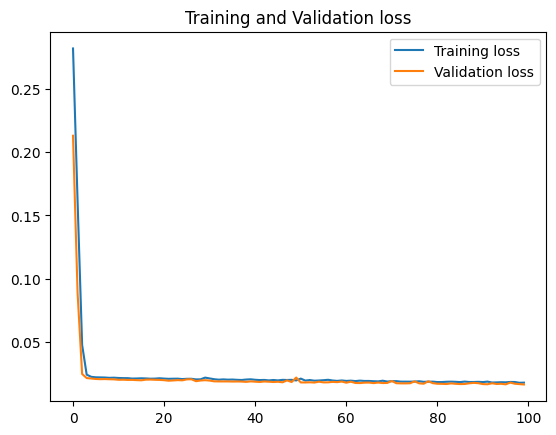

In [7]:
history_plot(history)

In [8]:
result =lstm_model_2.evaluate(x_test, y_test)
y_pred = lstm_model_2.predict(x_test) 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [9]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE

In [10]:
print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: [0.01656029187142849, 0.01656029187142849]
Test MAPE: 0.13881622118724166
Test Accuracy: 0.8611837788127583


In [11]:
all_predictions = []
input_window = x_test[-1]  

for i in range(1, 6): 
    print(f'Step {i} ==> Input Window: {input_window}')
    
    if len(input_window.shape) == 1:
        input_window = input_window.reshape(-1, 1)
    
    # Reshape input window to 3D for LSTM (1 sample, time_steps, features)
    y_temp = lstm_model_2.predict(input_window.reshape(1, input_window.shape[0], input_window.shape[1]))
    print(f"Prediction Output (y_temp): {y_temp}")
    all_predictions.extend(y_temp[0]) 
    input_window = np.roll(input_window, -1, axis=0)
    input_window[-1] = y_temp[0][0] 

Step 1 ==> Input Window: [[0.78622546]
 [0.787298  ]
 [0.78512603]
 [0.77634702]
 [0.76298979]
 [0.7950675 ]
 [0.80007869]
 [0.805211  ]
 [0.80688725]
 [0.77086254]
 [0.7752859 ]
 [0.78366553]
 [0.79247031]
 [0.77408777]
 [0.76068387]
 [0.79239162]
 [0.81956045]
 [0.77915648]
 [0.77102338]
 [0.78539784]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction Output (y_temp): [[0.7993037  0.8066597  0.8081905  0.82790244 0.79814243 0.81148493
  0.80349946]]
Step 2 ==> Input Window: [[0.787298  ]
 [0.78512603]
 [0.77634702]
 [0.76298979]
 [0.7950675 ]
 [0.80007869]
 [0.805211  ]
 [0.80688725]
 [0.77086254]
 [0.7752859 ]
 [0.78366553]
 [0.79247031]
 [0.77408777]
 [0.76068387]
 [0.79239162]
 [0.81956045]
 [0.77915648]
 [0.77102338]
 [0.78539784]
 [0.79930371]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction Output (y_temp): [[0.79944664 0.80677533 0.8082838  0.82795846 0.79830325 0.811499
  0.8035362 ]]
Step 3 ==> Input Window: [[0.78512603]
 [0.77634702]
 [0.76298979]
 [0.7950675 ]
 [0.8000786

In [12]:
num_samples = len(all_predictions)//7
all_predictions_array = np.array(all_predictions) 
all_predictions_reshaped = all_predictions_array.reshape(num_samples, 7)  
y_next_30 = scaler_Y.inverse_transform(all_predictions_reshaped)
y_next_30 = np.round(y_next_30)

In [13]:
y_next_30

array([[1684., 1697., 1699., 1712., 1682., 1706., 1692.],
       [1684., 1697., 1699., 1712., 1682., 1706., 1692.],
       [1685., 1698., 1700., 1713., 1683., 1706., 1693.],
       [1686., 1699., 1702., 1714., 1685., 1707., 1694.],
       [1689., 1701., 1703., 1716., 1687., 1709., 1696.]], dtype=float32)

In [14]:
x_train= x_train.reshape(x_train.shape[0], -1)
x_test= x_test.reshape(x_test.shape[0], -1)

print(f"X_test shape => {x_test.shape}\nX_train shape => {x_train.shape}")

X_test shape => (299, 20)
X_train shape => (1194, 20)


In [15]:
x_test=scaler_X.inverse_transform(x_test)
x_train=scaler_X.inverse_transform(x_train)

In [16]:
x_test[-1]

array([1656.579956, 1659.420044, 1656.219971, 1640.560059, 1617.209961,
       1674.560059, 1683.780029, 1693.219971, 1696.199951, 1632.170044,
       1640.02002 , 1654.930054, 1670.569946, 1637.890015, 1593.880005,
       1670.430054, 1718.72998 , 1626.22998 , 1633.310059, 1658.810059])

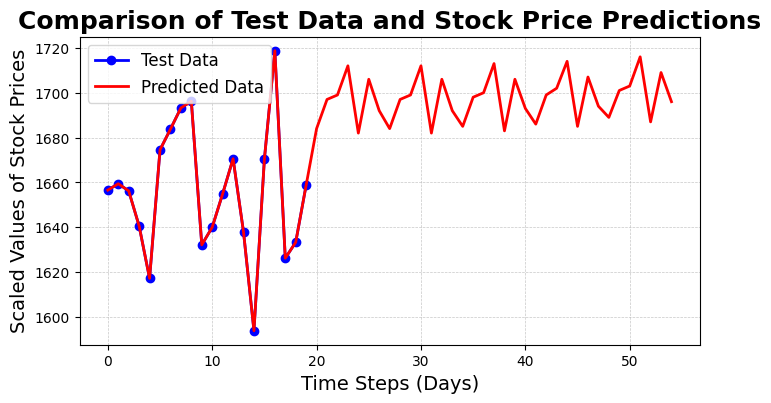

In [17]:
plt.figure(figsize=(8, 4))
plt.plot(x_test[-1], label='Test Data', marker='o', color='blue', linestyle='-', linewidth=2, markersize=6)
plt.plot(np.hstack([x_test[-1], y_next_30.reshape(-1)]), label='Predicted Data', color='red', linewidth=2, markersize=8)
plt.title('Comparison of Test Data and Stock Price Predictions', fontsize=18, fontweight='bold')
plt.xlabel('Time Steps (Days)', fontsize=14)
plt.ylabel('Scaled Values of Stock Prices', fontsize=14)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

In [18]:
last_date = clean_df.index[-1]
last_20_days=np.round(x_test[-1])
print(f" the last 20 days till {last_date}: {last_20_days}\npredicted  for 30 days: {y_next_30.flatten().tolist()}")

 the last 20 days till 2019-05-14 00:00:00: [1657. 1659. 1656. 1641. 1617. 1675. 1684. 1693. 1696. 1632. 1640. 1655.
 1671. 1638. 1594. 1670. 1719. 1626. 1633. 1659.]
predicted  for 30 days: [1684.0, 1697.0, 1699.0, 1712.0, 1682.0, 1706.0, 1692.0, 1684.0, 1697.0, 1699.0, 1712.0, 1682.0, 1706.0, 1692.0, 1685.0, 1698.0, 1700.0, 1713.0, 1683.0, 1706.0, 1693.0, 1686.0, 1699.0, 1702.0, 1714.0, 1685.0, 1707.0, 1694.0, 1689.0, 1701.0, 1703.0, 1716.0, 1687.0, 1709.0, 1696.0]
